In [3]:
# Plot Package
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

In [4]:
import pandas as pd
import os
from pybedtools import BedTool
import pybedtools
from matplotlib_venn import venn2
from matplotlib_venn import venn3

# Shared by coordinate

In [2]:
def Generate_Venn_Diagram(Raw_Path, Out_Path):
    
    INPUT_LIST = [f for f in os.listdir(Raw_Path) if not f.startswith('.')]  ## Exclude hidden file, start with .
    print (INPUT_LIST)
    if len(INPUT_LIST) == 2:
        print ('Input Two, Continue.')
        PATH_A = Raw_Path + '/' +INPUT_LIST[0]
        PATH_B = Raw_Path + '/' +INPUT_LIST[1]

    df1 = BedTool(PATH_A)
    df2 = BedTool(PATH_B)

    intersect_df = df1.intersect(df2, u=True)

    out = venn2(subsets=(len(df1-df2), len(df2-df1), len(df2+df1)),
              set_labels=(len(df1), len(df2)))
    for text in out.subset_labels:
        text.set_fontsize(14)
    
    #(df1-df2).saveas(Out_Path+str(len(df1-df2))+'_specific_'+INPUT_LIST[0][0:-4]+'.bed')
    #(df2-df1).saveas(Out_Path+str(len(df2-df1))+'_specific_'+INPUT_LIST[1][0:-4]+'.bed')
    #(df1+df2).saveas(Out_Path+str(len(df1+df2))+'_overlap_'+INPUT_LIST[1][0:-4]+'.bed')
    #(df2+df1).saveas(Out_Path+str(len(df2+df1))+'_overlap_'+INPUT_LIST[1][0:-4]+'.bed')
    plt.title(str(len(df2+df1))+'('+ str( len(df1+df2)) +')' )
    plt.show()
    return 0

def Generate_Venn3_Diagram(Raw_Path, Out_Path, num_order):
    INPUT_LIST = [f for f in os.listdir(Raw_Path) if not f.startswith('.')]  ## Exclude hidden file, start with .
    print (INPUT_LIST)
    if len(INPUT_LIST) == 3:
        print ('Input Three, Continue.')
        if (len(num_order) != 3 ):
            Num_Order=[0,1,2]
        else:
            Num_Order=num_order

    PATH_1 = Raw_Path + '/' +INPUT_LIST[Num_Order[0]]
    ConA=INPUT_LIST[Num_Order[0]][:-4]

    PATH_2 = Raw_Path + '/' +INPUT_LIST[Num_Order[1]]
    ConB=INPUT_LIST[Num_Order[1]][:-4]

    PATH_3 = Raw_Path + '/' +INPUT_LIST[Num_Order[2]]
    ConC=INPUT_LIST[Num_Order[2]][:-4]

    df1 = BedTool(PATH_1)
    df2 = BedTool(PATH_2)
    df3 = BedTool(PATH_3)

    merge_123 = df1.cat(df2.cat(df3))
    merge_123_with_counts=merge_123.intersect(df1,c=True).intersect(df2,c=True).intersect(df3,c=True)

    df_merge = pd.read_table(merge_123_with_counts.fn,sep="\t", header=None,
        names= ['#Chr', 'TSS','TES', ConA, ConB, ConC])


    A_Sum=df_merge[ConA].sum()
    B_Sum=df_merge[ConB].sum()
    C_Sum=df_merge[ConC].sum()

    df_merge.loc[df_merge.index[df_merge[ConA]>1], [ConA]]=1
    df_merge.loc[df_merge.index[df_merge[ConB]>1], [ConB]]=1
    df_merge.loc[df_merge.index[df_merge[ConC]>1], [ConC]]=1

    df_merge['ABC']=df_merge[ConA]+df_merge[ConB]+df_merge[ConC]
    df_merge['AB']=df_merge[ConA]+df_merge[ConB]
    df_merge['BC']=df_merge[ConB]+df_merge[ConC]
    df_merge['AC']=df_merge[ConA]+df_merge[ConC]

    if (len(df_merge['ABC'].value_counts()) < 3):  ## 1,2,3
        print ("At least Two sets have no overlap")
        center=0
    else:
        center=df_merge['ABC'].value_counts()[3]

    if (len(df_merge['AB'].value_counts()) < 3):   ## 0,1,2
        AB_com=0
    else:
        AB_com=df_merge['AB'].value_counts()[2]-center

    if (len(df_merge['AC'].value_counts()) < 3):  ## 0,1,2
        AC_com=0
    else:
        AC_com=df_merge['AC'].value_counts()[2]-center

    if (len(df_merge['BC'].value_counts()) < 3):  ## 0,1,2
        BC_com=0
    else:
        BC_com=df_merge['BC'].value_counts()[2]-center

    A_solo=A_Sum-AB_com-AC_com-center
    B_solo=B_Sum-AB_com-BC_com-center
    C_solo=C_Sum-AC_com-BC_com-center

    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
    
    out = venn3(subsets = (A_solo, B_solo, AB_com, C_solo, AC_com, BC_com, center), \
    set_labels = (len(df1),len(df2),len(df3)))#, linestyle='dashesd', linewidth=1)
    
    print (A_solo, B_solo, AB_com, C_solo, AC_com, BC_com, center)
    
    for text in out.subset_labels:
        #print text
        if (text != None):
            text.set_fontsize(16)
            
    for text in out.set_labels:
        #print text
        if (text != None):
            text.set_fontsize(18)
    plt.title('Venn3 of '+str(len(df3))+' & '+ str( len(df2)) +' & ' + str( len(df1)),fontsize=18 )
    plt.show()
    return 0


['576_DKO_Specific_DNase_Peaks.bed6', 'B_19042_Feature_Tcf1_WT_CD8_peaks.bed']
Input Two, Continue.


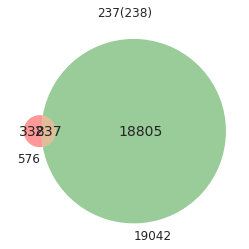

0

In [9]:
Raw_Path="/home/xli/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/DNaseq_seq_RNA_Seq_ChIP_seq_HiC/Features/Diff_DNase/DNase_By_edgeR/Results_From_EdgeR/Naive_Only/venn2/"
Out_Path=Raw_Path
num_order=[1,2,0]
#Generate_Venn3_Diagram(Raw_Path, Out_Path, num_order)
Generate_Venn_Diagram(Raw_Path, Out_Path)

['576_DKO_Specific_DNase_Peaks.bed6', '987_WT_Specific_DNase_Peaks.bed6', 'B_19042_Feature_Tcf1_WT_CD8_peaks.bed']
Input Three, Continue.
At least Two sets have no overlap
77 17895 910 339 0 237 0


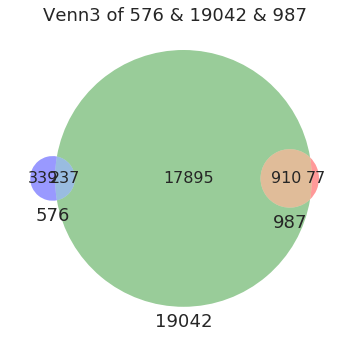

0

In [10]:
Raw_Path="/home/xli/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/DNaseq_seq_RNA_Seq_ChIP_seq_HiC/Features/Diff_DNase/DNase_By_edgeR/Results_From_EdgeR/Naive_Only/venn2/"
Out_Path=Raw_Path
num_order=[1,2,0]
Generate_Venn3_Diagram(Raw_Path, Out_Path, num_order)
#Generate_Venn_Diagram(Raw_Path, Out_Path)

# Shared by gene_id

In [ ]:
def Generate_Venn_Diagram(RAW_PATH, Out_Path, Merge_Column):
    from matplotlib_venn import venn2
    
    DIR_CHECK_CREATE(RAW_PATH)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 2:
        print ('Input Two, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')

        ### Union A and B, use indicator to differentiate them.
        union_A_B=df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer', indicator=True)

        intersection_A_B=union_A_B[union_A_B['_merge']=='both']
        only_A=union_A_B[union_A_B['_merge']=='left_only']
        only_B=union_A_B[union_A_B['_merge']=='right_only']

        #Output
        intersection_A_B.to_csv(OUT_PATH+'/Intersection_'+INPUT_LIST[0][:-4]+'_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        only_A.to_csv(OUT_PATH+'/Only_'+INPUT_LIST[0][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        only_B.to_csv(OUT_PATH+'/Only_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        union_A_B.to_csv(OUT_PATH+'/Union_'+INPUT_LIST[0][:-4]+'_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')


    out = venn2(subsets=(len(only_A[Merge_Column]), len(only_B[Merge_Column]), len(intersection_A_B[Merge_Column])),
          set_labels=(INPUT_LIST[0][:-4], INPUT_LIST[1][:-4] ) )
    for text in out.subset_labels:
        text.set_fontsize(18)
    plt.show()
    
def Generate_Venn3_Diagram(RAW_PATH, Out_Path, Merge_Column):
    from matplotlib_venn import venn3, venn3_circles
    RAW_PATH=RAW_PATH
    DIR_CHECK_CREATE(RAW_PATH)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 3:
        print ('Input Three, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]
        PATH_C = RAW_PATH + '/' +INPUT_LIST[2]

        ConA=INPUT_LIST[0][:-4]
        ConB=INPUT_LIST[1][:-4]
        ConC=INPUT_LIST[2][:-4]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')
        df_C = pd.read_csv(PATH_C,sep='\t')

        Merge_Column='gene_id'

        union_A_B_C = df_C.loc[:, [Merge_Column]].merge( df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer'), how='outer')

        intersection_metrix=np.zeros( (len(union_A_B_C),3), dtype=int)


        for j in range(len(union_A_B_C)):
            if (union_A_B_C.loc[j,'gene_id'] in df_A.loc[:,'gene_id']):
                intersection_metrix[j,0] == 1
            if (union_A_B_C.loc[j,'gene_id'] in df_B.loc[:,'gene_id']):
                intersection_metrix[j,1] == 1
            if (union_A_B_C.loc[j,'gene_id'] in df_C.loc[:,'gene_id']):
                intersection_metrix[j,2] == 1

        intersection_metrix = pd.DataFrame(union_A_B_C['gene_id'].isin(df_A['gene_id']))
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConA}),union_A_B_C['gene_id'].isin(df_B['gene_id'])], axis=1, join='inner')
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConB}),union_A_B_C['gene_id'].isin(df_C['gene_id'])], axis=1, join='inner')
        intersection_metrix = intersection_metrix.rename(columns={'gene_id':ConC})

        intersection_metrix = intersection_metrix*1


        intersection_metrix ['ABC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        intersection_metrix ['AB'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]
        intersection_metrix ['AC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,2]
        intersection_metrix ['BC'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        #intersection_metrix
        ABC = len(intersection_metrix[intersection_metrix['ABC']==3])
        AB = len(intersection_metrix[intersection_metrix['AB']==2])   -ABC
        BC = len(intersection_metrix[(intersection_metrix['BC']==2)]) -ABC
        AC = len(intersection_metrix[(intersection_metrix['AC']==2)]) -ABC

        A_solo = len(df_A) - ABC - AC - AB 
        B_solo = len(df_B) - ABC - BC - AB 
        C_solo = len(df_C) - ABC - AC - BC
        print (A_solo, B_solo, AB, C_solo, AC, BC, ABC)
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')
        
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8,8))
    out = venn3(subsets = (A_solo, B_solo, AB, C_solo, AC, BC, ABC), set_labels = (str(len(df_A))+"_"+ConA, str(len(df_B))+"_"+ConB,
                                                                                   str(len(df_C))+"_"+ConC))
    for text in out.subset_labels:
        if text == None:
            continue
        text.set_fontsize(18)
        
def Generate_Venn4_Diagram(RAW_PATH, Out_Path, Merge_Column):
    import venn
    DIR_CHECK_CREATE(RAW_PATH)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=sorted(os.listdir(RAW_PATH))
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 4:
        print ('Input Three, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]
        PATH_C = RAW_PATH + '/' +INPUT_LIST[2]
        PATH_D = RAW_PATH + '/' +INPUT_LIST[3]

        ConA=INPUT_LIST[0][:-4]
        ConB=INPUT_LIST[1][:-4]
        ConC=INPUT_LIST[2][:-4]
        ConD=INPUT_LIST[3][:-4]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')
        df_C = pd.read_csv(PATH_C,sep='\t')
        df_D = pd.read_csv(PATH_D,sep='\t')

        Merge_Column='gene_id'

        union_A_B_C_D = df_D.loc[:,[Merge_Column]].merge( df_C.loc[:, [Merge_Column]].merge( df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer'), how='outer'), how='outer')

        intersection_metrix=np.zeros( (len(union_A_B_C_D), 4), dtype=int)


        for j in range(len(union_A_B_C_D)):
            if (union_A_B_C_D.loc[j,'gene_id'] in df_A.loc[:,'gene_id']):
                intersection_metrix[j,0] == 1
            if (union_A_B_C_D.loc[j,'gene_id'] in df_B.loc[:,'gene_id']):
                intersection_metrix[j,1] == 1
            if (union_A_B_C_D.loc[j,'gene_id'] in df_C.loc[:,'gene_id']):
                intersection_metrix[j,2] == 1
            if (union_A_B_C_D.loc[j,'gene_id'] in df_D.loc[:,'gene_id']):
                intersection_metrix[j,3] == 1

        intersection_metrix = pd.DataFrame(union_A_B_C_D['gene_id'].isin(df_A['gene_id']))
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConA}),union_A_B_C_D['gene_id'].isin(df_B['gene_id'])], axis=1, join='inner')
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConB}),union_A_B_C_D['gene_id'].isin(df_C['gene_id'])], axis=1, join='inner')
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConC}),union_A_B_C_D['gene_id'].isin(df_D['gene_id'])], axis=1, join='inner')
        intersection_metrix = intersection_metrix.rename(columns={'gene_id':ConD})

        intersection_metrix = intersection_metrix*1

        
        
        intersection_metrix ['ABCD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]+intersection_metrix.iloc[:,3]
        
        intersection_metrix ['ABC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        intersection_metrix ['ABD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,3]
        intersection_metrix ['ACD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,2]+intersection_metrix.iloc[:,3]        
        intersection_metrix ['BCD'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]+intersection_metrix.iloc[:,3]
        
        intersection_metrix ['AB'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]
        intersection_metrix ['AC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,2]
        intersection_metrix ['AD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,3]
        intersection_metrix ['BC'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        intersection_metrix ['BD'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,3]
        intersection_metrix ['CD'] = intersection_metrix.iloc[:,2]+intersection_metrix.iloc[:,3]
        
        
        
        #intersection_metrix
        ABCD = len(intersection_metrix[intersection_metrix['ABCD']==4])
        
        ABC = len(intersection_metrix[intersection_metrix['ABC']==3])-ABCD
        ABD = len(intersection_metrix[intersection_metrix['ABD']==3])-ABCD
        ACD = len(intersection_metrix[intersection_metrix['ACD']==3])-ABCD
        BCD = len(intersection_metrix[intersection_metrix['BCD']==3])-ABCD
        
        AB = len(intersection_metrix[intersection_metrix['AB']==2])   -ABC-ABD-ABCD
        AC = len(intersection_metrix[(intersection_metrix['AC']==2)]) -ABC-ACD-ABCD
        AD = len(intersection_metrix[intersection_metrix['AD']==2])   -ABD-ACD-ABCD
        BC = len(intersection_metrix[(intersection_metrix['BC']==2)]) -ABC-BCD-ABCD
        BD = len(intersection_metrix[(intersection_metrix['BD']==2)]) -ABD-BCD-ABCD
        CD = len(intersection_metrix[(intersection_metrix['CD']==2)]) -ACD-BCD-ABCD

        A_solo = len(df_A) - ABCD - ABC - ABD - ACD - AB - AC - AD
        B_solo = len(df_B) - ABCD - ABC - ABD - BCD - AB - BC - BD
        C_solo = len(df_C) - ABCD - ABC - ACD - BCD - AC - BC - CD
        D_solo = len(df_D) - ABCD - ABD - ACD - BCD - AD - BD - CD
        print (A_solo, B_solo, AB, C_solo, AC, BC, ABC)
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')
        
    labels = venn.get_labels([{0},{0},{0},{0}],  fill=['number'])
    labels['1111'] = ABCD
    labels['1110'] = ABC
    labels['1101'] = ABD
    labels['1011'] = ACD
    labels['0111'] = BCD
    labels['1100'] = AB
    labels['1010'] = AC
    labels['1001'] = AD
    labels['0110'] = BC
    labels['0101'] = BD
    labels['0011'] = CD
    labels['1000'] = A_solo
    labels['0001'] = D_solo
    labels['0010'] = C_solo
    labels['0100'] = B_solo

    fig, ax = venn.venn4(labels, names=[ConA, ConB, ConC, ConD], figsize=(9,8))
    fig.show()
    
    #        Atlantic  Indian
    #whales     8        2
    #sharks     1        5
    #oddsratio, pvalue = stats.fisher_exact([[8, 2], [1, 5]])

    
    import scipy.stats as stats
    oddsratio, pvalue = stats.fisher_exact([[AC,AD],[BC,BD]])
    ax.set_title('Pvalue = '+ str(round(pvalue,5)), fontsize=28)
    
    df_venn4
    
    return union_A_B_C_D